# Disney Airlines Feature Exploration and Recommendations

*   **Student Name**: Emily Marsh
*   **Student Pace**: Flex
*   **Scheduled Project Review Date/Time**: 12:30 pm July 25th, 2023
*   **Instructor Name**: Morgan Jones

# Introduction

In 2019 JustDisney.co, a Walt Disney fan site, released a false rumor about a [Disney airline](https://airlinegeeks.com/2019/07/23/what-if-the-disney-airline-rumor-was-true/). While Disney at the time confirmed the story was false, the viral moment showed that there was considerable consumer interest in this venture. It is also becoming more clear that the airline industry is ripe for a new player in the field. 2023 is the first year since 2020, and the beginng of the COVID pandemic, [according to IATA](https://www.iata.org/en/pressroom/2022-releases/2022-12-06-01/), that airlines will have a net profit position. This net profitability is totaled at USD 9.8 billion. Now that the industry has stabilized due to lower fuel costs and increased travel, the potential profits are an enticing invitation for new companies such as Disney to expand into this promising market.

# Business Objective

The Disney Company is interested in entering the airline industry as a way to create a new profitable enterprise and as a natural addition to streamline the Disney resort and cruise experience that already has a loyal customer base. However, before investing capitol in this new venture, Disney has comissioned this project team to analyze and build a classification model to determine which airline features result in least amount of dissatisfied customers. As a company that inspires strong brand loyalty in its customers, making sure that there is a positive experience in all of its markets is of extreme importance. However, consideration will also be given to the cost to implement the recommended airline features to balance profit with customer experience. Using the dataset and outside research this project will provide insight into the top three airline features with the biggest impact reducing the number of dissatisfied customers. 

# Dataset

The dataset used for this project is a [dataset](https://github.com/emilykmarsh/Disney_Airline_Feature_Recommendation/blob/007779f247e641e1e05a07eff221c71a6d944829/Data/Raw/Invistico_Airline.csv) from **Kaggle**, and consists of **129,880 rows** and **23 columns**. This data was collected by an airline organization. The actual name of the company is not given due to privacy. The dataset consists of the details of customers who have already flown with this airline company. The feedback of the customers on various features of their flight and their flight data has been consolidated. The columns of the dataset includes the features **Satisfaction, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Seat Comfort, Departure/Arrival Time Conveniance, Food & Drink, Gate Location, Inflight Wifi Service, Inflight Entertainment, Online Support, Ease of Online Booking, On-Board Service, Leg Room Service, Baggage Handling, Checkin Service, Cleanliness, Online Boarding, Departure Delay in Minutes, and Arrival Delay in Minutes**. Individuals have two values for satisfaction:

*   **Satisfied**
*   **Dissatisfied**

Since the model will be used for identifying feature importance as well as predicting the satisfaction of the customer, **F1 Score** will be used to assess the accuracy of the models developed using the dataset. The reason for using an **F1 score** versus any other metrics of accuracy is that eliminating false negatives and false positives will ensure the accuracy of the feature recommendations. This model will be designed to be proactive as well as reactive, therefore eliminating false positives and negatives will be the goal.

## Import Libraries

In [1]:
#importing relevant libraries and tools

import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import tensorflow as tf
import scipy.stats as stats
import math
import shap
import pickle
from scipy import stats
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Importing TPU for Model Processing

Since the neural networks that will be utilized later in this notebook require extensive computational power, connecting with a TPU will sometimes be necessary to speed up the processing time needed to train and test these complicated models.

In [2]:
# Connect to TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print('Running on TPU:', tpu.master())
except ValueError:
    strategy = tf.distribute.OneDeviceStrategy("CPU")
    print('Running on CPU')

Running on CPU


In [3]:
# Check TPU status
tpu_available = tf.config.list_logical_devices('TPU')
if tpu_available:
    print("TPU is available.")
else:
    print("No TPU is available.")

No TPU is available.


## Initial Data Exploration

[(0.9155979, 0.55210684, 0.42070204), (0.888292, 0.40830288, 0.36223756), (0.81942908, 0.28911553, 0.38102921), (0.69226314, 0.23413578, 0.42480327), (0.56041794, 0.19845221, 0.44207535), (0.42355299, 0.16934709, 0.42581586)]


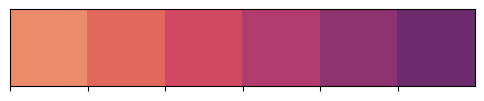

In [4]:
#creating a consistent color palatte for visualizations
pal = sns.color_palette("flare")
print(pal)
sns.palplot(pal)

In [5]:
#Using CSV reader to read dataframe into pandas

df = pd.read_csv('Data/Raw/Invistico_Airline.csv')

In [6]:
#initial overview of datasets columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
#cleaning column labels
df.rename(columns = {'satisfaction':'Satisfaction'}, inplace=True)

In [8]:
#examining new column label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [9]:
#Exploring the value counts of the target feature
df['Satisfaction'].value_counts()

Satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [10]:
#exploring the total amount of columns and rows in dataset

df

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [11]:
#dataset value cleaning
df.update(df['Customer Type'].replace({'disloyal Customer': 'Disloyal Customer'}))

In [12]:
#additional dataset value cleaning
df.update(df['Type of Travel'].replace({'Business travel': 'Business Travel'}))

In [13]:
#examining new value labels
df

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [14]:
#exploring overall shape of dataframe
df.shape

(129880, 23)

In [15]:
#exploration of distribution of values within the dataframe
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Understanding

Within this [dataset](https://github.com/emilykmarsh/Disney_Airline_Feature_Recommendation/blob/007779f247e641e1e05a07eff221c71a6d944829/Data/Raw/Invistico_Airline.csv), there are **object, float, and integer** datatypes. This means that all **object datatype features** will need to be transformed in order to be processed by the models developed in this project. In order to choose the appropriate categorical processing tool, the amount of possible values for each feature must be determined. Additional investigation will also be necessary to determine if there are any null values in the dataset that could interfere with accurate results and model performance.

To reproduce the findings of this team, a full copy of this notebook can be run by following the link [HERE](https://colab.research.google.com/drive/1h3zjKbLhFwWIenr_yGwgtKcO93ECpgwd?usp=drive_link) to the google colab notebook. Installations must be run first, and then the kernal restarted. Once the kernal restart has been completed, the entire notebook can be run. 

## Check for Null Values

In [16]:
#checking for null value
df.isna().sum()

Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Of all the columns in the dataframe, only Arrival Delay in Minutes has any null values. The amount of rows with **null values is only 393**. Compared to the total amount of rows in the dataset, this is a statistically insignificant amount of rows. Therefore the **393 rows** with null values will be dropped.

In [17]:
#dropping all rows with null values
dfnn = df.dropna()

In [18]:
#checking to make sure all null values are dropped
dfnn.isna().sum()

Satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [19]:
#examining new dataframe shape after dropping null values
dfnn.shape

(129487, 23)

## Checking Datatypes

In order to use the information in the dataset to build and train models, features must be either a **float or integer**. In order to convert these categorical columns several pre-processing tools are available for use. Deciding which one to use will be determined by the amount of unique values in each column.

In [20]:
# examining the data types of the df
dfnn.dtypes.value_counts()

int64      17
object      5
float64     1
Name: count, dtype: int64

# Categorical Data Processing

There are two types of categorical data in the dataset. One is **binary**, meaning there are only two possible values. The other is **multi-categorical**, meaning that there are more then two possible values for the feature. These two categorical types will be processed using the same method since the distinct different values of the features will be important when determining feature importance. **One hot encoder** will be used so that the model will be able to determine the effect of each of the possible values on the dependent variable. One hot encoder will split the possible values of the feature so that each value will have its own individual column with a numerical value.

In [21]:
#examining unique values

dfnn.nunique()

Satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

## Processing Satisfaction

Since the different values of satisfaction have an inherent ordered relationship and are the target feature, the type of pre-processing used will be cat codes. Cat codes will assign a numeric value to the object datatype that reflects the inherent ordered relationship to make interpretation simpler later on in the project.

In [22]:
#examining unique values of satisfaction column
dfnn['Satisfaction'].value_counts()

Satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

In [23]:
#assigning numeric values to satisfaction
dfnn['Satisfaction'] = pd.Categorical(dfnn['Satisfaction'], ['satisfied', 'dissatisfied'], ordered=True)
dfnn['Satisfaction'] = dfnn['Satisfaction'].cat.codes

In [24]:
#checking numeric values
dfnn['Satisfaction'].value_counts()

Satisfaction
0    70882
1    58605
Name: count, dtype: int64

## Processing Gender

Since the values of Gender have no inherent order, instead of cat codes One Hot Encoder will be utilized to process this categorical feature. 

In [25]:
#create a variable
gender_aspect = dfnn[["Gender"]]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# Fit the encoder on the age_aspect
ohe.fit(gender_aspect)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Female', 'Male'], dtype=object)]

In [26]:
# Transform gender_aspect using the encoder and assign the result to gender_aspect_encoded
gender_aspect_encoded = ohe.transform(gender_aspect)

# Visually inspect age_aspect_encoded
gender_aspect_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [27]:
# Make the transformed data into a dataframe
gender_aspect_encoded = pd.DataFrame(
    # Pass in NumPy array
    gender_aspect_encoded,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match data's index
    index=dfnn.index
)

# Visually inspect new dataframe
gender_aspect_encoded

,Female,Male
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
129875,1.0,0.0
129876,0.0,1.0
129877,0.0,1.0
129878,0.0,1.0


In [28]:
# Drop original Gender column
dfnn.drop("Gender", axis=1, inplace=True)

# Visually inspect data
dfnn

,Satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,1,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,1,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,1,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [29]:
# Concatenate the new dataframe with current data
dfnn = pd.concat([dfnn, gender_aspect_encoded], axis=1)

# Visually inspect data
dfnn

,Satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male
0,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,0,3,5,3,2,0,0.0,1.0,0.0
1,0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,4,4,4,2,3,2,310,305.0,0.0,1.0
2,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,3,3,4,4,4,2,0,0.0,1.0,0.0
3,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,0,1,4,1,3,0,0.0,1.0,0.0
4,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,0,2,4,2,5,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,Disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,3,3,4,4,4,2,0,0.0,1.0,0.0
129876,1,Disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,2,3,3,1,2,1,174,172.0,0.0,1.0
129877,1,Disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,4,3,4,2,3,2,155,163.0,0.0,1.0
129878,1,Disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,3,2,3,2,1,2,193,205.0,0.0,1.0


The one hot encoder has successfully processed the gender feature and assigned each of the possible two values its own column. Not only will this help the dataset to be used to create a model, but it will also help identify the impact each of the values of the feature has on the dependent variable. Since one hot encoder was successful in processing the Gender feature, it will now be used on the remaining object datatype features.

## Processing Customer Type

In [30]:
#using onehotencoder on customer type feature
cus_aspect = dfnn[["Customer Type"]]
ohe.fit(cus_aspect)
cus_aspect_encoded = ohe.transform(cus_aspect)
cus_aspect_encoded = pd.DataFrame(
    cus_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Customer Type", axis=1, inplace=True)

dfnn = pd.concat([dfnn, cus_aspect_encoded], axis=1)

dfnn

,Satisfaction,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer
0,0,65,Personal Travel,Eco,265,0,0,0,2,2,...,3,5,3,2,0,0.0,1.0,0.0,0.0,1.0
1,0,47,Personal Travel,Business,2464,0,0,0,3,0,...,4,2,3,2,310,305.0,0.0,1.0,0.0,1.0
2,0,15,Personal Travel,Eco,2138,0,0,0,3,2,...,4,4,4,2,0,0.0,1.0,0.0,0.0,1.0
3,0,60,Personal Travel,Eco,623,0,0,0,3,3,...,1,4,1,3,0,0.0,1.0,0.0,0.0,1.0
4,0,70,Personal Travel,Eco,354,0,0,0,3,4,...,2,4,2,5,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,Personal Travel,Eco,1731,5,5,5,3,2,...,4,4,4,2,0,0.0,1.0,0.0,1.0,0.0
129876,1,63,Personal Travel,Business,2087,2,3,2,4,2,...,3,1,2,1,174,172.0,0.0,1.0,1.0,0.0
129877,1,69,Personal Travel,Eco,2320,3,0,3,3,3,...,4,2,3,2,155,163.0,0.0,1.0,1.0,0.0
129878,1,66,Personal Travel,Eco,2450,3,2,3,2,3,...,3,2,1,2,193,205.0,0.0,1.0,1.0,0.0


## Processing Type of Travel

In [31]:
#using onehotencoder on type of travel feature
type_aspect = dfnn[["Type of Travel"]]
ohe.fit(type_aspect)
type_aspect_encoded = ohe.transform(type_aspect)
type_aspect_encoded = pd.DataFrame(
    type_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Type of Travel", axis=1, inplace=True)

dfnn = pd.concat([dfnn, type_aspect_encoded], axis=1)

dfnn

,Satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel
0,0,65,Eco,265,0,0,0,2,2,4,...,3,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0,47,Business,2464,0,0,0,3,0,2,...,3,2,310,305.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0,15,Eco,2138,0,0,0,3,2,0,...,4,2,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0,60,Eco,623,0,0,0,3,3,4,...,1,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,70,Eco,354,0,0,0,3,4,3,...,2,5,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,Eco,1731,5,5,5,3,2,5,...,4,2,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
129876,1,63,Business,2087,2,3,2,4,2,1,...,2,1,174,172.0,0.0,1.0,1.0,0.0,0.0,1.0
129877,1,69,Eco,2320,3,0,3,3,3,2,...,3,2,155,163.0,0.0,1.0,1.0,0.0,0.0,1.0
129878,1,66,Eco,2450,3,2,3,2,3,2,...,1,2,193,205.0,0.0,1.0,1.0,0.0,0.0,1.0


## Processing Class

In [32]:
#using onehotencoder on class feature
class_aspect = dfnn[["Class"]]
ohe.fit(class_aspect)
class_aspect_encoded = ohe.transform(class_aspect)
class_aspect_encoded = pd.DataFrame(
    class_aspect_encoded,
    columns=ohe.categories_[0],
    index=dfnn.index)

dfnn.drop("Class", axis=1, inplace=True)

dfnn = pd.concat([dfnn, class_aspect_encoded], axis=1)

In [33]:
#examining new dataset with transformed object datatype features
dfnn

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
0,0,65,265,0,0,0,2,2,4,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0,47,2464,0,0,0,3,0,2,2,...,305.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0,15,2138,0,0,0,3,2,0,2,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,60,623,0,0,0,3,3,4,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,70,354,0,0,0,3,4,3,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,29,1731,5,5,5,3,2,5,2,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
129876,1,63,2087,2,3,2,4,2,1,1,...,172.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
129877,1,69,2320,3,0,3,3,3,2,2,...,163.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
129878,1,66,2450,3,2,3,2,3,2,2,...,205.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [34]:
#examining new dataframe shape
dfnn.shape

(129487, 28)

In [35]:
#examining new columns of dataframe
dfnn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129487 non-null  int8   
 1   Age                                129487 non-null  int64  
 2   Flight Distance                    129487 non-null  int64  
 3   Seat comfort                       129487 non-null  int64  
 4   Departure/Arrival time convenient  129487 non-null  int64  
 5   Food and drink                     129487 non-null  int64  
 6   Gate location                      129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Inflight entertainment             129487 non-null  int64  
 9   Online support                     129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  On-board service                   129487 no

Now that all of the original five categorical features have been split into nine float and integer columns, the dataset is properly prepared to be used for additional analysis and model building.

# Dataset Exploration and Initial Analysis

Intial data exploration and analysis is helpful in understanding trends within the dataset before beginning to build the baseline models.

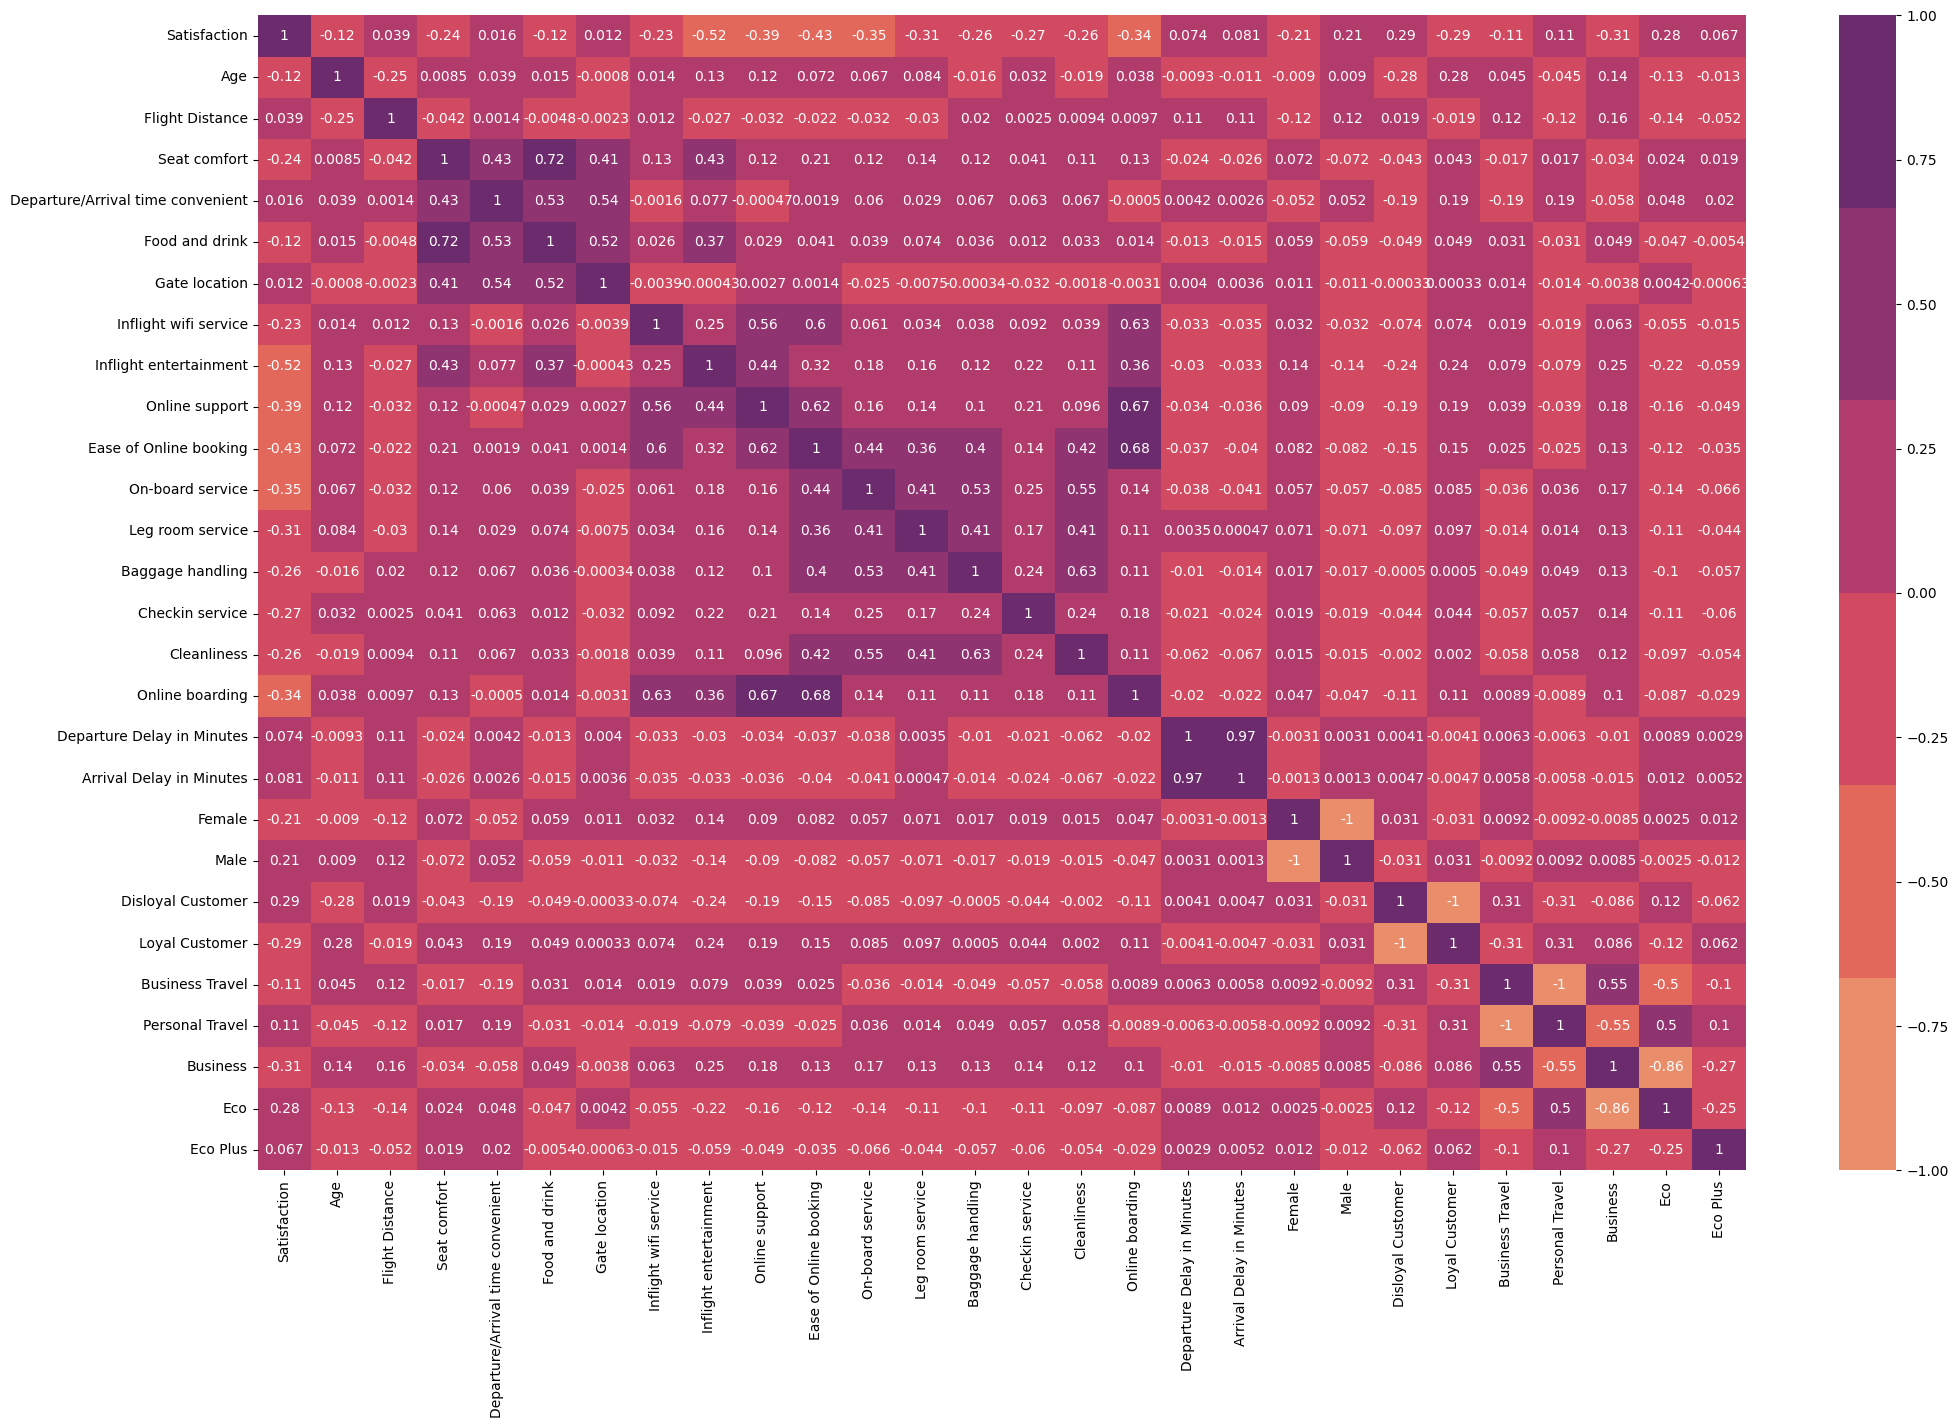

In [36]:
# Early correlation matrix to understand relationships within the features that are being analyzed

plt.figure(figsize= (24,15))
corrM = dfnn.corr()

sns.heatmap(corrM, annot = True, cmap=pal)
plt.show()


The correlation matrix seems to indicate that no one variable highly correlates with satisfaction level, either positvely or negatively. This may indicate that no one feature has an outsized impact on the dependent variable. There is correlation between categorical feature values from the same feature that have been processed into separate columns which would be expected. Finally, there are several features that seem heavily correlated with each other. The highest correlation value is between Departure Delay and Arrival Delay. This correlation makes sense since usually a departure delay results in an arrival delay. There is also a high correlation value between online features such as online booking and online check. However this correlation is not as high as the correlation between arrival and departure.

In [37]:
dfnn.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.452594,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,...,15.091129,0.507410,0.492590,0.183138,0.816862,0.690764,0.309236,0.478735,0.448825,0.072440
std,0.497749,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,...,38.465650,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the distribution of values within the features, scaling could be an issue because the values in the dataset vary widely between object dataypes, float and integer features. There is also an unbalanced amount of rows for each feature value. For example for Gender there seems to be a roughly equal distribtuion of men and women, but for Type of Travel the majority of entries were traveling for business. This distribution could contribute to inherent biases in the model.

# Dataset Preprocessing

From the inital data exploration, the only additional preprocessing that will be implemented on the dataset will be dropping the departure delay column. The size of the dataset will potentially be problematic for modeling more complex models, such as neural networks, with limited amounts of available processing power. Therefore, a sample of the dataset will be taken in order to train and fit the models.

## Dropping Departure Delay Column

The extrememly high correlation between arrival delay and departure delay is indicative of multicollinearity that could affect the accuracy of the model. Using domain knowledge, it also seems unlikely that a plane that is delayed in departure will not have a delayed arrival time. Therefore, both of these columns are describing the same delay. Additional exploration of both columns will be made to confirm which column should be dropped.

In [38]:
delay_col = dfnn[['Departure Delay in Minutes', 'Arrival Delay in Minutes']]

In [39]:
delay_col.describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000
mean,14.643385,15.091129
std,37.932867,38.465650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


Overall, the statistical details for both columns are extremely similar. Since passengers are more likely to be concerned about a delay in arrival, this will be the column that will be retained in the dataset for model building and fitting.

In [40]:
dfnn = dfnn.drop(columns = ['Departure Delay in Minutes'])

## Creating A Sample of Larger Dataset

Since the dataset is large, a more efficent way to utilize computational resources is to take a sampling of the dataset. There are several techniques that can be used to determine the optimal amount of samples and which samples should be used for model building and fitting. These techniques will be utilized and an statistically similar but smaller sample of the dataset will be created.

## Determine the Number of Samples

Determining the appropriate sample size depends on several factors. These include the desired level of precision, confidence level, and the dataset's variability. There is no fixed rule for determining the sample size, but a statistical formula, such as Yamane's formula, can be used to estimate a reasonable sample size. Yamane's formula is a statistical sampling method used to determine the appropriate sample size for a given population. It takes into account the population size and desired level of confidence to calculate the necessary sample size for accurate data collection in surveys or research studies. Since this classification dataset is the result of a survey and each entry represents one member of the population, Yamane's formula can be utilized.

In [41]:
#Creating a function to calculate the optimal sample size using
def calculate_yamane_sample_size(population_size, confidence_level, margin_of_error):
    """
    Calculate sample size using Yamane's formula.

    Args:
        population_size (int): Total size of the population.
        confidence_level (float): Desired confidence level (between 0 and 1).
        margin_of_error (float): Desired margin of error (between 0 and 1).

    Returns:
        int: Sample size estimation.

    """
    n = population_size / (1 + population_size * (margin_of_error**2))
    n = n / (1 + (n - 1) / population_size * (confidence_level**2))

    return math.ceil(n)

# Example usage:
population_size = 129487
confidence_level = 0.99
margin_of_error = 0.01

sample_size = calculate_yamane_sample_size(population_size, confidence_level, margin_of_error)
print("Yamane's estimated sample size:", sample_size)

Yamane's estimated sample size: 8674


## Random Sampling

Now that the size of the sample has been determined, which entries of the dataset to include in the smaller sample must be determined. Random Sampling is a potentially helpful tool. Random sampling means randomly selecting a subset of data points from the original dataset. This method is useful in creating a representative sample of the larger dataset and preserves the original distribution of the dataset in all features.

In [42]:
sample_size = 8674  # Desired size of the smaller dataset

# Randomly sample the data
smaller_dataset = dfnn.sample(n=sample_size, random_state=42)

In [43]:
#examining the sample dataset
smaller_dataset.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,...,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,0.459995,39.430021,1987.138806,2.829721,2.980632,2.846092,2.979248,3.243371,3.362578,3.515448,...,15.073784,0.501038,0.498962,0.189417,0.810583,0.696103,0.303897,0.479133,0.448351,0.072516
std,0.498426,14.988223,1018.961819,1.402157,1.536547,1.457715,1.306145,1.327812,1.361064,1.313810,...,38.674762,0.500028,0.500028,0.391862,0.391862,0.459965,0.459965,0.499593,0.497354,0.259355
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1370.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1946.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2540.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6813.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
#examining the original dataset
dfnn.describe()

,Satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Female,Male,Disloyal Customer,Loyal Customer,Business Travel,Personal Travel,Business,Eco,Eco Plus
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.452594,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,...,15.091129,0.507410,0.492590,0.183138,0.816862,0.690764,0.309236,0.478735,0.448825,0.072440
std,0.497749,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,...,38.465650,0.499947,0.499947,0.386781,0.386781,0.462180,0.462180,0.499550,0.497376,0.259216
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1584.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The statistics for each feature seem to be mostly unchanged despite it being a much smaller subset of the original dataset. Random sampling was useful in making sure that the original distributions of the dataset were retained.

In [45]:
#examining the value counts of the target value in the smaller dataset
smaller_dataset['Satisfaction'].value_counts()

Satisfaction
0    4684
1    3990
Name: count, dtype: int64

In [46]:
#examining the original value counts of the target value in the larger dataset
dfnn['Satisfaction'].value_counts()

Satisfaction
0    70882
1    58605
Name: count, dtype: int64

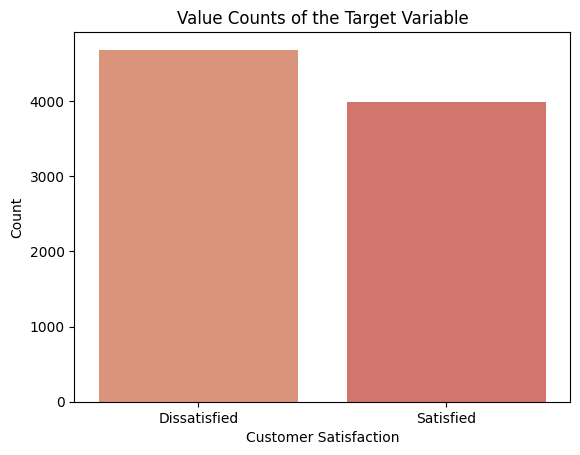

In [47]:
#creating a visualization of target value counts
ax = sns.countplot(x= smaller_dataset['Satisfaction'].index, data=smaller_dataset['Satisfaction'], palette=pal)
plt.title('Value Counts of the Target Variable')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
ax.set_xticklabels(['Dissatisfied', 'Satisfied'])
plt.savefig("Images/ValueCountsofTargetVariable.png")
plt.show();


Between the original dataset and the smaller dataset, it is consistent that there are more dissatisfied customers then satisfied customers. This distribution will be retained since limiting dissatisfaction is the main goal of the client.

## Train Test Split

In order to accurately build and fit the models for feature recommendation, the smaller sample dataset will be split into the target and feature variables. Then a test and train sample will be created from the smaller dataset to evaluate the F1 score and accuracy of the models performance on the test dataset.

In [48]:
#split dataset into dependent variables and indepedent variables

aspects = smaller_dataset.drop(columns=['Satisfaction'], axis=1)
target = smaller_dataset['Satisfaction']

In [49]:
#instatiate a test train split

X = aspects
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, \
                                                    random_state = 42)

# Building Baseline Models

In order to determine which baseline model is appropriate for the dataset, three initial models will be built. Once built, the most accurate baseline model will be selected to fine tune and determine feature importance. The F1 score will be used as a determinate of which model is the most accurate. The reason the F1 score will be used is that, as an expression of the precision and recall of the model, the higest F1 score limits the amount of false positives and false negatives. This is important since the project wants a model to correctly predict the satisfaction & dissatisfaction of consumers.

## Baseline Logistic Regression Model

A baseline logistic regression model is a simple and interpretable statistical model used for binary classification. It assumes a linear relationship between input features and the log-odds of the target class, estimating probabilities using the logistic function. Though it has limitations, logistic regression serves as a practical and transparent starting point for creating a baseline model for the dataset.

In [50]:
#instantiate logistic regression model
logreg = LogisticRegression(random_state=123)

#fit the model onto the train sets
logreg.fit(X_train,y_train)
logreg

#predict values of the model
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#evaluate model
names = ['Satisfied','Dissatisfied']
f1_logreg = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.78      0.83      0.81      1180
Dissatisfied       0.78      0.73      0.75       989

    accuracy                           0.78      2169
   macro avg       0.78      0.78      0.78      2169
weighted avg       0.78      0.78      0.78      2169



## Baseline KNN Model

A K-nearest neighbors (KNN) model is a flexible and non-parametric algorithm used for classification tasks. It classifies instances by finding the K nearest neighbors in the training data based on their feature similarity and assigns the majority class label among them to the new instance. KNN does not assume any underlying distribution of data and can capture complex decision boundaries. However, it can be sensitive to the choice of K and may struggle with high-dimensional data.

In [51]:
#instantiate
knn_baseline_model = KNeighborsClassifier()

#fit onto the data
knn_baseline_model.fit(X_train,y_train)

#predict
y_hat_train = knn_baseline_model.predict(X_train)
y_hat_test = knn_baseline_model.predict(X_test)

#evaluate model
f1_knn = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.62      0.66      0.64      1180
Dissatisfied       0.56      0.52      0.54       989

    accuracy                           0.59      2169
   macro avg       0.59      0.59      0.59      2169
weighted avg       0.59      0.59      0.59      2169



## Baseline Decision Tree Model

A decision tree model is a versatile and interpretable algorithm for classification. It creates a hierarchical structure of decision rules based on input features, capturing complex relationships. While prone to overfitting, decision trees offer transparency and serve as a helpful baseline for classification tasks.

In [52]:
#instantiate
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)

#predict
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

#evaluate model
f1_tree = round(f1_score(y_test,y_hat_test,average='macro'),3)
print(classification_report(y_test,y_hat_test,target_names=names))

              precision    recall  f1-score   support

   Satisfied       0.92      0.91      0.92      1180
Dissatisfied       0.89      0.91      0.90       989

    accuracy                           0.91      2169
   macro avg       0.91      0.91      0.91      2169
weighted avg       0.91      0.91      0.91      2169



## Selecting A Baseline Model

In [53]:
#import the metrics library
print(f'f1-score of baseline logistic regression is {f1_logreg}')
print(f'f1-score of knn model is {f1_knn}')
print(f'f1-score of baseline decision tree is {f1_tree}')

f1-score of baseline logistic regression is 0.779
f1-score of knn model is 0.587
f1-score of baseline decision tree is 0.908


Comparing all three baseline model's F1 scores on the test dataset, it appears that the baseline Decision Tree Model's F1 score for the test dataset is significantly higher then the baseline KNN Model's F1 score and the baseline Logistic Regression Model's F1 score. An additional visualization of performance will be used to make a final decision about which baseline model will be further explored and optimized.

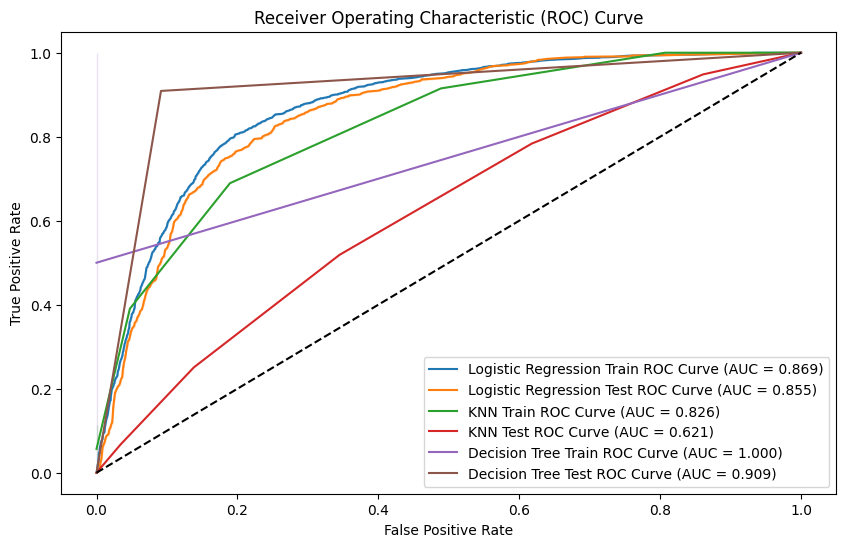

In [54]:
# Obtain predicted probabilities for positive class
y_prob_logreg_train = logreg.predict_proba(X_train)[:, 1]
y_prob_logreg_test = logreg.predict_proba(X_test)[:, 1]

y_prob_knn_train = knn_baseline_model.predict_proba(X_train)[:, 1]
y_prob_knn_test = knn_baseline_model.predict_proba(X_test)[:, 1]

y_prob_clf_train = clf.predict_proba(X_train)[:, 1]
y_prob_clf_test = clf.predict_proba(X_test)[:, 1]


# Compute false positive rate (FPR), true positive rate (TPR), and thresholds for each model
fpr_logreg_train, tpr_logreg_train, thresholds_logreg_train = roc_curve(y_train, y_prob_logreg_train)
fpr_logreg_test, tpr_logreg_test, thresholds_logreg_test = roc_curve(y_test, y_prob_logreg_test)

fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(y_train, y_prob_knn_train)
fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(y_test, y_prob_knn_test)

fpr_clf_train, tpr_clf_train, thresholds_clf_train = roc_curve(y_train, y_prob_clf_train)
fpr_clf_test, tpr_clf_test, thresholds_clf_test = roc_curve(y_test, y_prob_clf_test)

# Compute area under the ROC curve (AUC) for each model
auc_logreg_train = auc(fpr_logreg_train, tpr_logreg_train)
auc_logreg_test = auc(fpr_logreg_test, tpr_logreg_test)

auc_knn_train = auc(fpr_knn_train, tpr_knn_train)
auc_knn_test = auc(fpr_knn_test, tpr_knn_test)

auc_clf_train = auc(fpr_clf_train, tpr_clf_train)
auc_clf_test = auc(fpr_clf_test, tpr_clf_test)

# Create DataFrames for the ROC curve data of each model
roc_df_logreg_train = pd.DataFrame({'False Positive Rate': fpr_logreg_train, 'True Positive Rate': tpr_logreg_train})
roc_df_logreg_test = pd.DataFrame({'False Positive Rate': fpr_logreg_test, 'True Positive Rate': tpr_logreg_test})

roc_df_knn_train = pd.DataFrame({'False Positive Rate': fpr_knn_train, 'True Positive Rate': tpr_knn_train})
roc_df_knn_test = pd.DataFrame({'False Positive Rate': fpr_knn_test, 'True Positive Rate': tpr_knn_test})

roc_df_clf_train = pd.DataFrame({'False Positive Rate': fpr_clf_train, 'True Positive Rate': tpr_clf_train})
roc_df_clf_test = pd.DataFrame({'False Positive Rate': fpr_clf_test, 'True Positive Rate': tpr_clf_test})

# Plot the ROC curves using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=roc_df_logreg_train, x='False Positive Rate', y='True Positive Rate', label=f'Logistic Regression Train ROC Curve (AUC = {auc_logreg_train:.3f})')
sns.lineplot(data=roc_df_logreg_test, x='False Positive Rate', y='True Positive Rate', label=f'Logistic Regression Test ROC Curve (AUC = {auc_logreg_test:.3f})')

sns.lineplot(data=roc_df_knn_train, x='False Positive Rate', y='True Positive Rate', label=f'KNN Train ROC Curve (AUC = {auc_knn_train:.3f})')
sns.lineplot(data=roc_df_knn_test, x='False Positive Rate', y='True Positive Rate', label=f'KNN Test ROC Curve (AUC = {auc_knn_test:.3f})')

sns.lineplot(data=roc_df_clf_train, x='False Positive Rate', y='True Positive Rate', label=f'Decision Tree Train ROC Curve (AUC = {auc_clf_train:.3f})')
sns.lineplot(data=roc_df_clf_test, x='False Positive Rate', y='True Positive Rate', label=f'Decision Tree Test ROC Curve (AUC = {auc_clf_test:.3f})')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

The visualization of the ROC Curves of all three intitial baseline models confirms what is shown in the F1 score. Of all three models, the Decision Tree Test ROC Curve is the closest to the top left corner of the chart, indicating that the Decision Tree Model has a better performance than either the Logistic Regression or the KNN model. Therefore additional optimization of the Decision Tree Model will be explored.

# Decision Tree Model

In [55]:
#re-run the basline model so all variables are updated correctly
#for the train and test sets

#instantiate
clf = DecisionTreeClassifier(criterion='entropy',random_state=123)

#fit the model onto the train sets
clf.fit(X_train,y_train)
clf

#predict
y_tree_train = clf.predict(X_train)
y_tree_test = clf.predict(X_test)

print('TRAIN SCORES')
print(classification_report(y_train,y_tree_train,target_names=names))
print('--------------------------------------------------------------')
print('TEST SCORES')
print(classification_report(y_test,y_tree_test,target_names=names))

accuracy_tree_train = accuracy_score(y_train,y_tree_train)
accuracy_tree_test = accuracy_score(y_test,y_tree_test)

f1_score_tree_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_tree_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

--------------------------------------------------------------
TEST SCORES
              precision    recall  f1-score   support

   Satisfied       0.92      0.91      0.92      1180
Dissatisfied       0.89      0.91      0.90       989

    accuracy                           0.91      2169
   macro avg       0.91      0.91      0.91      2169
weighted avg       0.91      0.91      0.91      2169



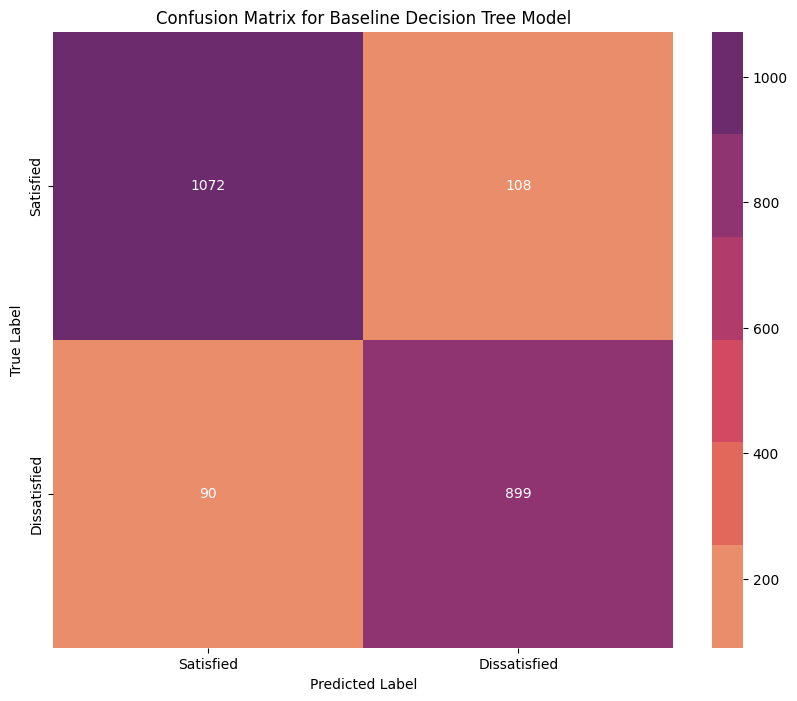

In [56]:
#Confusion Matrix for Baseline Decision Tree Model
cm = confusion_matrix(y_test, y_hat_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=pal, xticklabels=names, yticklabels=names)
plt.title("Confusion Matrix for Baseline Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Looking at the performance of the train dataset versus the test dataset in the Decision Tree Model, it appears the model is over fitting to the training data as is common with these types of models. In particular, the value of dissatisfied appears to show the greatest variation between the train data F1 score and the test data F1 score. In order to try and improve the F1 score and reduce overfitting to the train dataset, hyperparameter tuning might lead to an increase without modifying the actual dataset itself.

## Hyperparameter Tuning

Since the Decision Tree Model is overfitting to the training data, Tree Pruning is necessary to reduce over fitting and increase the weighted F1 score of the model. In order to prune effectively, optimal Max_Depth, Min_Samples_Split, & Min_Samples_Leaf must be determined. To make sure that effective parameter ranges are being picked, the current parameters that were set be default need to be examined.

In [57]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

According to the presets, there was no value assigned for max_depth. As a result, a range to explore the optimal values will be assigned to determine the affect of this parameter on the f1 score of the model.

## Determining Optimal Max_Depth

The max_depth parameter in a Decision Tree Model specifies the maximum depth or level of the tree, limiting the number of splits and controlling the complexity of the model.

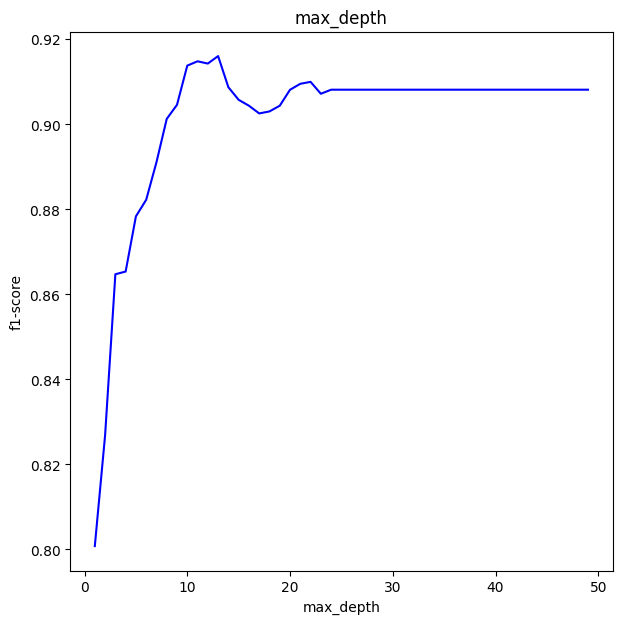

In [58]:
#creating a list of depth values
max_depth = np.arange(1,50)

#creating an empty list to store scores for each depth
f1_test_scores = []


# create a loop for the classifier to run with the different depth values
for depth in max_depth:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')


    #add the scores to the list
    f1_test_scores.append(f1)


#visualize the data
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(max_depth,f1_test_scores,c='b')
ax.set_xlabel('max_depth')
ax.set_ylabel('f1-score')
ax.set_title('max_depth');

The accuracy of the model peaks at max_depth 12 and levels off. This will be the optimal value for the adjusted Decision Tree Model.



## Determining Optimal Min_Samples_Split

The min_samples_split parameter in a Decision Tree Model specifies the minimum number of samples required to perform a split, which helps control the model's performance by preventing further splits if the number of samples at a node is below the specified threshold, and thereby reducing the risk of overfitting. In the original min_samples_split default settings, the value was set to 2. Therefore the range will be set to include the default and higher values to see if a more optimal value for the parameter can be determined.

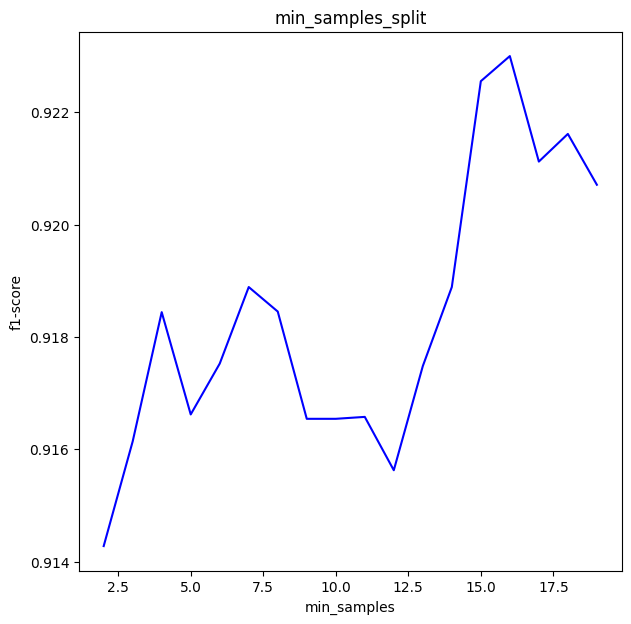

In [59]:
#use the optimum value of depth
depth = 12

#define a range of min_samples_for each split
min_samples_range = np.arange(2,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_samples_range:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=sample,random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')

    #add the scores to the list
    f1_test_scores.append(f1)


#visualize
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_samples_range,f1_test_scores,c='b')

ax.set_xlabel('min_samples')
ax.set_ylabel('f1-score')
ax.set_title('min_samples_split')
plt.show();

The accuracy of the model peaks at min_samples 16 and then sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

## Determining Optimal Min_Samples_Leaf

The min_samples_leaf parameter in a Decision Tree Model specifies the minimum number of samples required to be at a leaf node, helping to control the model's performance by preventing the creation of leaf nodes with too few instances, which can reduce overfitting and improve generalization.

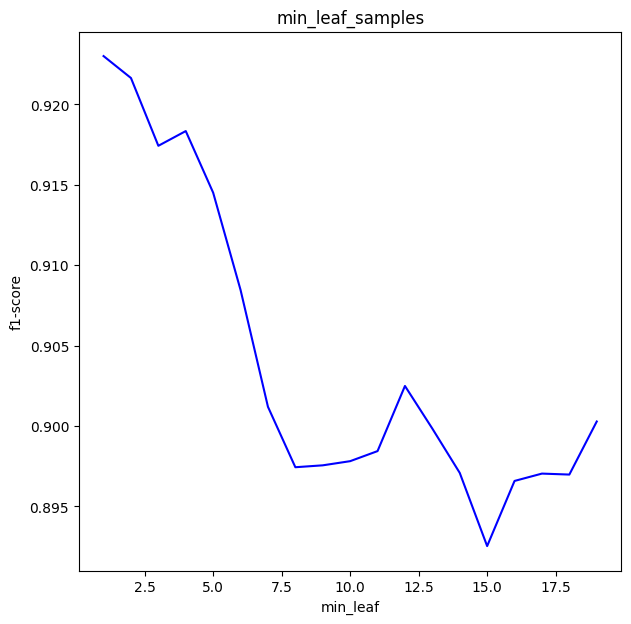

In [60]:
#use the optimum value of depth,min_samples_split
depth = 12
min_samples = 16

#define a range of min_samples_for each split
min_leaf_range = np.arange(1,20)

#create a loop with the optimum depth and different min_samples
#creating an empty list to store scores for each depth
f1_test_scores = []

# create a loop for the classifier to run with the different depth values
for sample in min_leaf_range:

    #instantiate
    classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                       min_samples_leaf=sample, random_state=123)

    #fit the model
    classifier.fit(X_train,y_train)

    #predict values
    y_hat_test = classifier.predict(X_test)

    #calculate
    f1 = f1_score(y_test,y_hat_test,average='macro')

    #add the scores to the list
    f1_test_scores.append(f1)


#visual
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(min_leaf_range,f1_test_scores,c='b')

ax.set_xlabel('min_leaf')
ax.set_ylabel('f1-score')
ax.set_title('min_leaf_samples')

plt.show();

The accuracy of the model peaks at the min_leaf value of 1 and sharply decreases. This will be the optimal value for the adjusted Decision Tree Model.

## Decision Tree Model with Optimized Parameters

In [61]:
#run the model with the optimized parameters
depth=12
min_samples=16
leaf=1

#instantiate
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=depth,min_samples_split=min_samples,
                                    min_samples_leaf=leaf,random_state=123)

#fit the model
classifier.fit(X_train,y_train)

#predict values
y_hat_train = classifier.predict(X_train)
y_hat_test = classifier.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_hat_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_hat_test,target_names=names))

accuracy_optimized_train = accuracy_score(y_train,y_hat_train)
accuracy_optimized_test = accuracy_score(y_test,y_hat_test)

f1_score_optimized_train = f1_score(y_train,y_hat_train,average='macro')
f1_score_optimized_test = f1_score(y_test,y_hat_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.96      0.96      3504
Dissatisfied       0.95      0.96      0.95      3001

    accuracy                           0.96      6505
   macro avg       0.96      0.96      0.96      6505
weighted avg       0.96      0.96      0.96      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.92      0.93      1180
Dissatisfied       0.91      0.93      0.92       989

    accuracy                           0.92      2169
   macro avg       0.92      0.92      0.92      2169
weighted avg       0.92      0.92      0.92      2169



Using the optimized parameters, overfitting to the train data series was reduced and the AUC and F1 score were increased for the test data series. However tuning each individual hyperparameter is not the most effective way at finding the optimal parameters. A more sophisticated parameter tuning tool like grid search will be utilized.

## Tuning the Decision Tree with GridSearchCV

Since additional tuning can be done more effectively with the GridSearch tool, the ranges were expanded from the original parameter tuning in order to explore more possible values to find the optimal parameters. These additional parameters will be the criterion options and additional values will be explored in max_depth, min_samples_split, and min_samples_leaf.

In [62]:
#with strategy.scope():

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_split': [1, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

gs_tree = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')
gs_tree.fit(X_train, y_train)

gs_tree.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 20}

In [63]:
#get predictions from the gridsearch

#with strategy.scope():

#predict values
y_gst_train = gs_tree.predict(X_train)
y_gst_test = gs_tree.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_gst_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_gst_test,target_names=names))

accuracy_gst_train = accuracy_score(y_train,y_gst_train)
accuracy_gst_test = accuracy_score(y_test,y_gst_test)

f1_score_gst_train = f1_score(y_train,y_gst_train,average='macro')
f1_score_gst_test = f1_score(y_test,y_gst_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.97      0.96      3504
Dissatisfied       0.96      0.95      0.96      3001

    accuracy                           0.96      6505
   macro avg       0.96      0.96      0.96      6505
weighted avg       0.96      0.96      0.96      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.93      0.92      0.92      1180
Dissatisfied       0.90      0.91      0.91       989

    accuracy                           0.92      2169
   macro avg       0.92      0.92      0.92      2169
weighted avg       0.92      0.92      0.92      2169



Despite using a more sophisticated tuning tool like gridsearch, the F1 score of the train dataset actually went down from .92 to .91. Since optimizing the paramaters is not enough to reduce over fitting, another model will be built and trained.

# Random Forest Classifier Model


A Random Forest Classifier model utilizes multiple Decision Tree Models in order to increase the accuracy of the model overall. Since the Decision Tree Model was so successful with this dataset, it's worth exploring this ensemble method model to see if there are any gains in the F1 score and a reduction in overfitting.

## Random Forest Clasifier Baseline Model

In [64]:
#build a baseline Random Forest Classifier

rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [65]:
  #predict values
  y_rfc_train = rfc.predict(X_train)
  y_rfc_test = rfc.predict(X_test)

In [66]:
#with strategy.scope():
#fit the model
rfc.fit(X_train,y_train)

#predict values
y_rfc_train = rfc.predict(X_train)
y_rfc_test = rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_rfc_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_rfc_test,target_names=names))

accuracy_rfc_train = accuracy_score(y_train,y_rfc_train)
accuracy_rfc_test = accuracy_score(y_test,y_rfc_test)

f1_score_rfc_train = f1_score(y_train,y_rfc_train,average='macro')
f1_score_rfc_test = f1_score(y_test,y_rfc_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.93      0.94      1180
Dissatisfied       0.92      0.93      0.92       989

    accuracy                           0.93      2169
   macro avg       0.93      0.93      0.93      2169
weighted avg       0.93      0.93      0.93      2169



Even before being optimized, the Random Forest has increased the AUC and F1 score of the test data series from .92 to .93. Using GridSearch, it will be determined if tuning the model using GridSearch can lead to an even higher AUC and F1 score for the test dataset.

## Tuning the Random Forest Classifier with GridSearchCV

In [67]:
#determine default parameters
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [68]:
#define a param grid based on defaults

param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,6,9,12,15,20],
              'min_samples_leaf': [1,5,10],
              'min_samples_split': [2,4,6,8]
             }

In [69]:
#fit the gridsearch
#with strategy.scope():
rf = RandomForestClassifier(class_weight= 'balanced')
grid_rfc = GridSearchCV(rf, param_grid, cv = 5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12, 15, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='accuracy')

In [70]:
#print the best parameters
#with strategy.scope():
print(grid_rfc.best_params_)


{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [71]:
#get predictions from the gridsearch

#with strategy.scope():
#predict values
y_grf_train = grid_rfc.predict(X_train)
y_grf_test = grid_rfc.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_grf_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_grf_test,target_names=names))

accuracy_grf_train = accuracy_score(y_train,y_grf_train)
accuracy_grf_test = accuracy_score(y_test,y_grf_test)

f1_score_grf_train = f1_score(y_train,y_grf_train,average='macro')
f1_score_grf_test = f1_score(y_test,y_grf_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       0.99      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.94      0.94      0.94      1180
Dissatisfied       0.92      0.93      0.93       989

    accuracy                           0.93      2169
   macro avg       0.93      0.93      0.93      2169
weighted avg       0.93      0.93      0.93      2169



Using the gridsearch, the AUC and the F1 score of the test dataset was increased to .93. Another model, XGBoost, will be explored in order to continue trying to raise the F1 score and decrease overfitting. 

# XGBoost Model

XGBoost models are excellent for classification problems due to their ability to handle complex interactions between features and their regularization techniques, which help prevent overfitting. They leverage an ensemble of Decision Trees, boosting their predictive power and providing highly accurate and robust classifications for a wide range of tasks. Using this model will hopefully allow for more consistent AUC  and F1 scores across the test and train datasets.

## XGBoost Baseline Model

In [72]:
#with strategy.scope():
# Instantiate XGBClassifier
xgb_base = XGBClassifier(eval_metric='logloss')

# Fit XGBClassifier
xgb_base.fit(X_train, y_train)

# Predict on training and test sets
y_xgb_train = xgb_base.predict(X_train)
y_xgb_test = xgb_base.predict(X_test)

accuracy_xgb_train = accuracy_score(y_train,y_xgb_train)
accuracy_xgb_test = accuracy_score(y_test,y_xgb_test)

f1_score_xgb_train = f1_score(y_train,y_xgb_train,average='macro')
f1_score_xgb_test = f1_score(y_test,y_xgb_test,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_xgb_test,target_names=names))

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.96      0.94      0.95      1180
Dissatisfied       0.93      0.95      0.94       989

    accuracy                           0.95      2169
   macro avg       0.94      0.95      0.94      2169
weighted avg       0.95      0.95      0.95      2169



The F1 score for all satisfaction levels is higher in the testing data compared to any of the other models that have been explored. As promised, the XGBoost has done a much better job minimzing overfitting compared to the other models trained on the dataset. Similar to the previous models, GridSearch will also be implemented on the XGBoost Model to find the optimal parameters.

## Tuning the XGBoost Model with GridSearchCV

In [73]:
  #determine default parameters
  xgb_base.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [74]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6]
        }


In [75]:
#with strategy.scope():
xgb = XGBClassifier(eval_metric='mlogloss')
grid_xgb = GridSearchCV(xgb, params, scoring='accuracy', cv=None, n_jobs=1)
grid_xgb.fit(X_train, y_train)

best_xgb_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_xgb_parameters.keys()):
    print('%s: %r' % (param_name, best_xgb_parameters[param_name]))

Grid Search found the following optimal parameters: 
colsample_bytree: 1.0
gamma: 0.5
max_depth: 6
min_child_weight: 1
subsample: 1.0


In [76]:
#get predictions from the gridsearch

#with strategy.scope():
#predict values
y_grid_xgb_train = grid_xgb.predict(X_train)
y_grid_xgb_test = grid_xgb.predict(X_test)

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_train,y_grid_xgb_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_test,y_grid_xgb_test,target_names=names))

accuracy_grid_xgb_train = accuracy_score(y_train,y_grid_xgb_train)
accuracy_grid_xgb_test = accuracy_score(y_test,y_grid_xgb_test)

f1_score_grid_xgb_train = f1_score(y_train,y_grid_xgb_train,average='macro')
f1_score_grid_xgb_test = f1_score(y_test,y_grid_xgb_test,average='macro')

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       1.00      1.00      1.00      3504
Dissatisfied       1.00      1.00      1.00      3001

    accuracy                           1.00      6505
   macro avg       1.00      1.00      1.00      6505
weighted avg       1.00      1.00      1.00      6505

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.95      0.93      0.94      1180
Dissatisfied       0.92      0.95      0.93       989

    accuracy                           0.94      2169
   macro avg       0.94      0.94      0.94      2169
weighted avg       0.94      0.94      0.94      2169



The AUC and F1 score of the parameter tuned XGBoost model is slightly less then the default parameters. It could be that additional exploration of parameters could increase performance. However, with limited computational power, this additional exploration is not possible at this time. Therefore the most successful model based on the F1 metric so far is the baseline XGBoost model. One more model will be explored for a potential rise in performance.

# Neural Network

A Neural Network is a machine learning model inspired by the human brain, composed of interconnected layers of artificial neurons. Through backpropagation, it adjusts the weights to learn from data and minimize prediction errors during training. In classification datasets, Neural Networks excel at learning complex patterns, enabling accurate classification of input data into different classes, making them valuable for tasks like image recognition, sentiment analysis, and more. Despite the high performance of the XGBoost model, the Neural Network model may have higher a performance on the test data series and be able to minimize over fitting to the train data set that has been seen in previously expored models. The article ['Binary Classification Tutorial with the Keras Deep Learning Library'](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/) was utilized for the testing and training of these models.

## Data Preparation for Neural Network Model

In [77]:
#Preparing dataset to be formatted into an array format
df_neural = smaller_dataset

In [78]:
#Extracting the values from the data set
dataset = df_neural.values

In [79]:
#examining the new array of values
dataset

array([[0.000e+00, 3.700e+01, 3.785e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 6.000e+01, 1.784e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 2.700e+01, 1.825e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.300e+01, 1.334e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 5.700e+01, 1.074e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 4.200e+01, 3.148e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [80]:
#examining the shape of the array of values
dataset.shape

(8674, 27)

In [81]:
#splitting array into feature and target values
X = dataset[:,1:27].astype(float)
Y = dataset[:,0]

In [82]:
# encode target values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

## Neural Network Baseline Model

In [83]:
# creating a function for a baseline model
def create_baseline():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [84]:
#with strategy.scope():
# evaluate model with standardized dataset
estimator = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_base_results = cross_val_score(estimator, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_base_results = cross_val_score(estimator, X, encoded_Y, cv=kfold)
#Print the mean and standard deviation of the F1 scores
print("Base F1 scores: %.2f%% (%.2f%%)" % (f1_base_results.mean() * 100, f1_base_results.std() * 100))
# Print the mean and standard deviation of the F1 scores
print("Base Acc scores: %.2f%% (%.2f%%)" % (acc_base_results.mean() * 100, acc_base_results.std() * 100))

Base F1 scores: 79.80% (4.83%)
Base Acc scores: 80.97% (3.74%)


The baseline Neural Network's AUC and F1 Score is significantly lower then the performance of the XGBoost Model. However, this Neural Network was run with no data preparation of the dataset which can improve performance. This data preparation will be explored to see if it can increase the model's F1 score on the test data series.

## Re-Run the Baseline Model with Data Preparation

The Neural Network model typically performs best with consistent input values, both in scale and distribution. As a result, standardization is a very effective technique for improving the suitability of the data for the neural network model. The data series will be rescaled so that the mean value for each feature is 0 and the standard deviation is 1. This rescaling preservevs the Gaussian and Gaussian like distributions while also normalizing the central tendencies. A pipeline will be used to implement the StanardScaler and will prevent the algorithim from having knowledge of the test data series.

In [85]:
#with strategy.scope():
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_prep_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_prep_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# Print the mean and standard deviation of the F1 scores
print("Data Prep F1 scores: %.2f%% (%.2f%%)" % (f1_prep_results.mean() * 100, f1_prep_results.std() * 100))
# Print the mean and standard deviation of the F1 scores
print("Data Prep Acc scores: %.2f%% (%.2f%%)" % (acc_prep_results.mean() * 100, acc_prep_results.std() * 100))

Data Prep F1 scores: 91.99% (0.49%)
Data Prep Acc scores: 91.73% (0.50%)


The effectiveness of this preparation is immediatly apparent. Both the F1 score and AUC has increased significantly. However, the neural network is still being out performed by the XGBoost model according to the AUC and F1 score metrics. Two additional methods for increasing the Neural Network Model's performance will be explored.

## Evaluate a Smaller Dataset

There are many aspects that can be tuned with a Neural Network, but one that has an outsized effect on performance is the structure of the network itself. As a result making the structure of the network smaller or larger can have a positive impact performance. By making the baseline model with 60 neurons in the hidden layer and reducing it by half, the network will be pressured to pick out the most important structures in the input data to model. The standard scaler will also still be used.

In [86]:
# smaller model
def create_smaller():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

#with strategy.scope():
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_small_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring = 'f1_macro')
acc_small_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller F1: %.2f%% (%.2f%%)" % (f1_small_results.mean()*100, f1_small_results.std()*100))
print("Smaller Accuracy: %.2f%% (%.2f%%)" % (acc_small_results.mean()*100, acc_small_results.std()*100))

Smaller F1: 91.82% (0.41%)
Smaller Accuracy: 91.70% (0.86%)


The F1 score and AUC did decrease slightly, though the standard deviation of the AUC did decrease. Nevertheless, the improvement in performance was not significant enough to outperform the XGBoost models. One last aspect tuning will be explored.

## Evaluate a Larger Dataset

Similar to evaluating a smaller dataset, a larger dataset is evaluated by exploring if adding more layers offers more oppurtunities for the network to extract key features and recombine them in nonlinear ways. This is done by adding one new layer to the network that introduces another hidden layer with 30 neurons after the first hidden layer. This additional layer will potentially aid in the process and lift performance.

In [87]:
# larger model
def create_larger():
 # create model
 model = Sequential()
 model.add(Dense(26, input_shape=(26,), activation='relu'))
 model.add(Dense(30, activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

#with strategy.scope():
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=4, shuffle=True)
f1_large_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_large_results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger F1: %.2f%% (%.2f%%)" % (f1_large_results.mean()*100, f1_large_results.std()*100))
print("Larger Accuracy: %.2f%% (%.2f%%)" % (acc_large_results.mean()*100, acc_large_results.std()*100))

Larger F1: 91.60% (0.59%)
Larger Accuracy: 91.09% (0.65%)


Similar to the smaller Neural Network, a larger dataset did not lead to the lift in performance that was hoped for. However, this additional exploration confirms that the baseline XGBoost Model is performing at the highest level as confirmed by the F1 Score and AUC.

# Visualize Scores Between Models

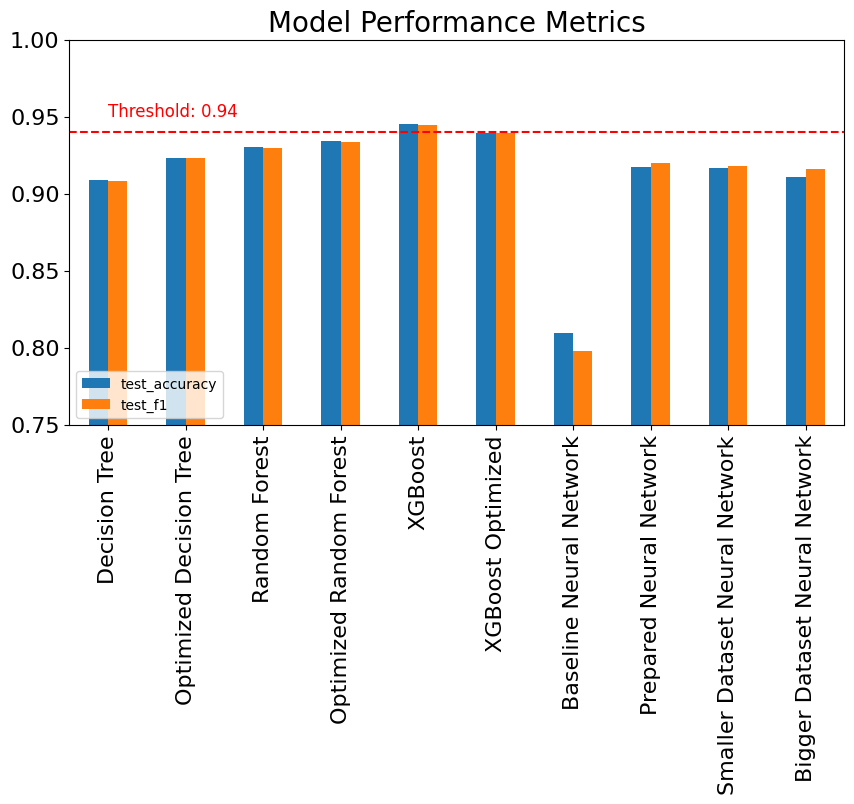

In [88]:
# Create a dataframe of the scores
score_df = pd.DataFrame({'test_accuracy': [accuracy_tree_test, accuracy_optimized_test, accuracy_rfc_test,
                                           accuracy_grf_test, accuracy_xgb_test, accuracy_grid_xgb_test,
                                           (acc_base_results.mean()), (acc_prep_results.mean()), (acc_small_results.mean()),
                                           (acc_large_results.mean())],
                         'test_f1': [f1_score_tree_test, f1_score_optimized_test, f1_score_rfc_test,
                                           f1_score_grf_test, f1_score_xgb_test, f1_score_grid_xgb_test,
                                     (f1_base_results.mean()), (f1_prep_results.mean()), (f1_small_results.mean()), (f1_large_results.mean())]
                        }, index=['Decision Tree', 'Optimized Decision Tree','Random Forest',
                                  'Optimized Random Forest', 'XGBoost', 'XGBoost Optimized', 'Baseline Neural Network',
                                  'Prepared Neural Network','Smaller Dataset Neural Network', 'Bigger Dataset Neural Network'])

# Plot the data
score_df.plot.bar(figsize=(10, 5))
plt.legend(loc='lower left')
plt.title('Model Performance Metrics', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set y-axis limits
plt.ylim(0.75, 1)

# Add a horizontal line at 0.94
plt.axhline(0.94, color='r', linestyle='--')

# Add a label for the line
plt.text(0, 0.95, 'Threshold: 0.94', color='r', fontsize=12)

plt.savefig("Images/ModelPerformanceMetrics.png")
# Display the plot
plt.show();

In [89]:
top_3_models = score_df.sort_values('test_f1', ascending=False).head(3)

In [90]:
print(top_3_models)

                         test_accuracy   test_f1
XGBoost                       0.945136  0.944789
XGBoost Optimized             0.939604  0.939248
Optimized Random Forest       0.934071  0.933604


Using the visualization, the XGBoost Baseline is the model with the highest F1 score of .944 and an AUC score of .945. However, the Neural Network models were evaluated using a Stratified Kfold instead of a train test split. To confirm that the XGBoost still out performs the Neural Network, Stratified Kfold will be used to confirm the AUC and F1 score of the XGBoost baseline.

## Confirming Final Model Selection with K Fold



The main difference between Test Train Split and Stratified K-Fold cross-validation lies in how the data is split and used for evaluation. Test Train Split is a simpler approach where the data is divided into two sets, but it can lead to biased evaluation results, especially with imbalanced data. Stratified K-Fold cross-validation addresses this bias by ensuring that each fold maintains the original class distribution, resulting in a more reliable evaluation of the model's performance. Stratified K-Fold is generally preferred, especially when dealing with limited data or imbalanced datasets. Therefore to keep evlauation of the different models consistent, the XGBoost baseline model will be evaluated using Stratified K-Fold.

In [91]:
# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=4, shuffle=True)

# Perform cross-validation and compute the scores
f1_results = cross_val_score(xgb_base, X, encoded_Y, cv=kfold, scoring='f1_macro')
acc_results = cross_val_score(xgb_base, X, encoded_Y, cv=kfold, scoring='accuracy')

# Print the mean and standard deviation of the F1 scores
print("F1 scores: %.2f%% (%.2f%%)" % (f1_results.mean() * 100, f1_results.std() * 100))

# Print the mean and standard deviation of the accuracy scores
print("Accuracy scores: %.2f%% (%.2f%%)" % (acc_results.mean() * 100, acc_results.std() * 100))


F1 scores: 93.83% (0.41%)
Accuracy scores: 93.97% (0.38%)


Despite Stratified K-Fold being a more strenuous evaluation technique then a test train split, the resulting AUC and F1 scores are almost exactly the same, .9409 versus .9451. Also compared to the Neural Networks evaluation, the XGBoost baseline model still outperforms the F1 score by .025. Therefore the XGBoost can be confirmed as the most sucessful model evaluated.

# Evaluation of Final Model On Full Dataset

Now that the XGBoost baseline model has been confirmed to be the most successful according to the F1 score metric, the model can be run with the entire dataset. A classification model tends to perform better with the more data available, so using the entire dataset might lead to a rise in AUC and F1 score.

In [92]:
#split dataset into dependent variables and indepedent variables with full dataset

aspects_full = dfnn.drop(columns=['Satisfaction'], axis=1)
target_full = dfnn['Satisfaction']

In [93]:
#instatiate a test train split on full dataset

X_full = aspects_full
y_full = target_full

X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size = 0.25, \
                                                    random_state = 42)

In [94]:
#with strategy.scope():
# Instantiate XGBClassifier
final_model = XGBClassifier(eval_metric='mlogloss')

# Fit XGBClassifier
final_model.fit(X_full_train, y_full_train)

# Predict on training and test sets
y_final_train = final_model.predict(X_full_train)
y_final_test = final_model.predict(X_full_test)

accuracy_final_train = accuracy_score(y_full_train,y_final_train)
accuracy_final_test = accuracy_score(y_full_test,y_final_test)

f1_score_final_train = f1_score(y_full_train,y_final_train,average='macro')
f1_score_final_test = f1_score(y_full_test,y_final_test,average='macro')

#scores
print('TRAIN SCORES')
print('---------------------------------------------------------')
print(classification_report(y_full_train,y_final_train,target_names=names))
print('TEST SCORES')
print('----------------------------------------------------------')
print(classification_report(y_full_test,y_final_test,target_names=names))

TRAIN SCORES
---------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.98      0.97      0.97     53206
Dissatisfied       0.96      0.98      0.97     43909

    accuracy                           0.97     97115
   macro avg       0.97      0.97      0.97     97115
weighted avg       0.97      0.97      0.97     97115

TEST SCORES
----------------------------------------------------------
              precision    recall  f1-score   support

   Satisfied       0.97      0.96      0.96     17676
Dissatisfied       0.95      0.96      0.96     14696

    accuracy                           0.96     32372
   macro avg       0.96      0.96      0.96     32372
weighted avg       0.96      0.96      0.96     32372



There was an increase in the AUC and F1 score of the model's performance on the test dataset even though it is interesting to note that the sample of the larger dataset still resulted in a fairly accurate model with much less computational power utilized. However, it appears that with a larger dataset the model was able to reduce overfitting to the train dataset.

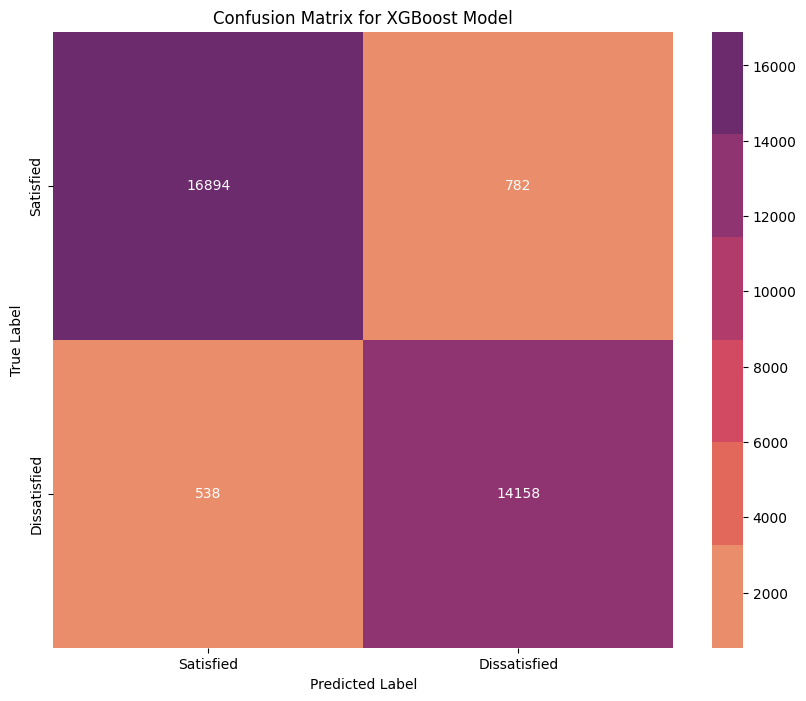

In [95]:
#Confusion Matrix for Baseline Decision Tree Model
cm = confusion_matrix(y_full_test, y_final_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=pal, xticklabels=names, yticklabels=names)
plt.title("Confusion Matrix for XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Images/ConfusionMatrixFinalModel.png")
plt.show();

According to the classification matrix, the XGBoost Baseline Model is predicting true positives at a larger quantity for both satisfied and dissatisfied levels. It does appear that the model is slighly more likely to predict that customers were dissatisfied when they were actually satisifed. This could be due to the imbalanaced amounts of dissatisfied customers versus satisfied in the dataset. Balancing these target values may potentially be a way to further increase the performance of the model on unseen data.

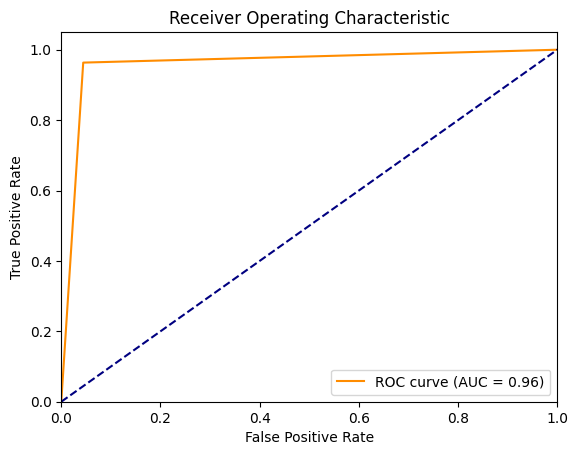

In [96]:
fpr, tpr, thresholds = roc_curve(y_full_test, y_final_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("Images/ROCCurveFinalModel.png")
plt.show();


The ROC curve chart also confirms the .96 AUC level of the model's performance. The curve is extremely close to the left hand corner, confirming the high level of the model's accuracy. All three of these visualizations verify the decision to select the XGBoost Baseline Model as the Final Model for prediction and feature recommendation.

# Pickling Final Model

For reproducibility, a file with the final XGBoost Model will be saved to the project folder

In [97]:
pickle.dump(final_model, open('finalmodel.pkl','wb'))

# Saving Final Pre-Processed Dataset to CSV

For reproducibility, a file with the final processed dataset and smaller sub-sample will be saved to the project's folder

In [98]:
file_path_processed_dataset = 'Data/Processed/Processed_Dataset.csv'

In [99]:
dfnn.to_csv(file_path_processed_dataset, index=False)

In [100]:
file_path_sample = 'Data/Processed/Sample_Dataset.csv'

In [101]:
smaller_dataset.to_csv(file_path_sample, index=False)

# Feature Importance

Now that the most successful model has been selected, this Final Model will be used to determine the impact of individual features on the model's predictions. By determining these impacts, recommendations can be made proactively to result in less dissatisfied customers. In order to determine the feature importance according to the XGBoost baseline model, an article found [HERE](https://mljar.com/blog/feature-importance-xgboost/) laid out three ways to code and explore feature importance. These three methods are the **XGBoost Built In Feature Importance function, Permutation Importance**, and **SHAP Values**. All three methods will be explored to determine which will give the most valuable information for the business problem.

## XGBoost Built-In Feature Importance

XGBoost's Built In Feature Importance Function quantifies each feature's influence on predictions, helping identify the most relevant ones. It computes scores based on the frequency and impact of features in Decision Trees, enabling focus on key features and model optimization. This feature enhances transparency and provides valuable insights into XGBoost's predictive performance.

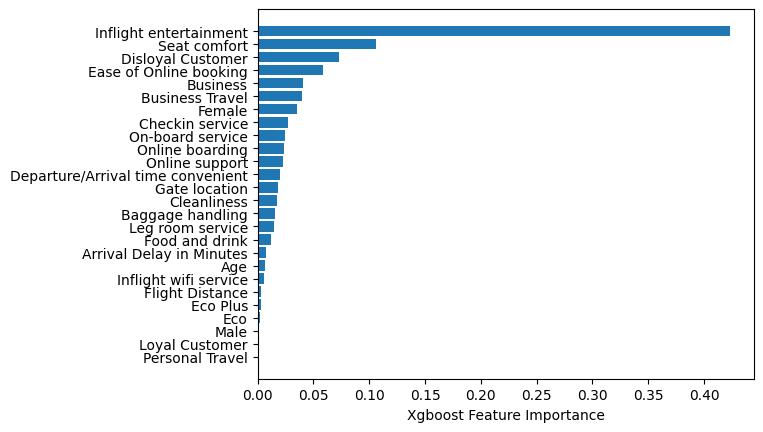

In [102]:
# plot feature importance
sorted_idx = final_model.feature_importances_.argsort()
plt.barh(aspects.columns[sorted_idx], final_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance");

According to the Built In Feature Importance Function in the XGBoost model, the top five important features are **Inflight Entertainment, Seat Comfort, Disloyal Customer, and Ease of Online Booking**. These feature findings will be compared to the other feature importance evaluations for further exploration.

## Permutation Based Feature Importance

Permutation-Based Feature Importance for an XGBoost model involves assessing the impact of each feature by randomly permuting its values and measuring the resulting decrease in model performance. The higher the decrease in performance after permutation, the more important the feature is deemed to be. This technique allows for the identification of crucial features and their contribution to the model's predictive power. By iteratively permuting each feature and measuring its effect, this method provides valuable insights into feature relevance and helps optimize the model by focusing on the most influential features.

In [103]:
perm_importance = permutation_importance(final_model, X_full_test, y_full_test)

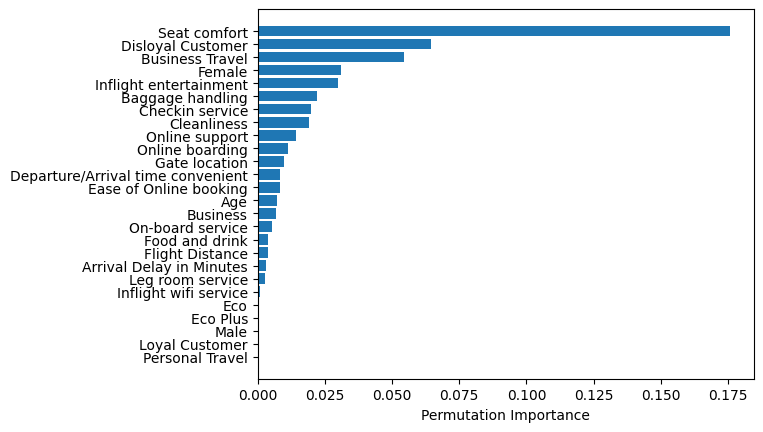

In [104]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(aspects.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

According to the Permutation Based Feature Importance, the top five important features are **seat comfort, disloyal customer, business travel, female, and inflight entertainment**. This difference between these results and the built in feature importance is important to note. Though the top fives features identified are roughly the same, the meausre of their importance tends to vary between the two visualizations. Also, both of these measurements only say what features are important and not how they are important to the predicted target value. This is where using SHAP Values to calculate feature importance can be more helpful.

## Feature Importance Computed with SHAP Values

Feature importance computed with SHAP (SHapley Additive exPlanations) values for an XGBoost Model provides a comprehensive and interpretable assessment of each feature's contribution to individual predictions. SHAP values are based on cooperative game theory, considering all possible feature interactions and their impact on model predictions. They provide a fair allocation of importance scores to each feature across predictions, offering a more reliable and consistent measure of feature significance. This approach enables users to understand the exact reasons behind a model's prediction for a specific instance, enhancing model transparency and trustworthiness. By using SHAP values, deeper insights can be gained into feature effects and making better-informed decisions.

In [105]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_full_test)

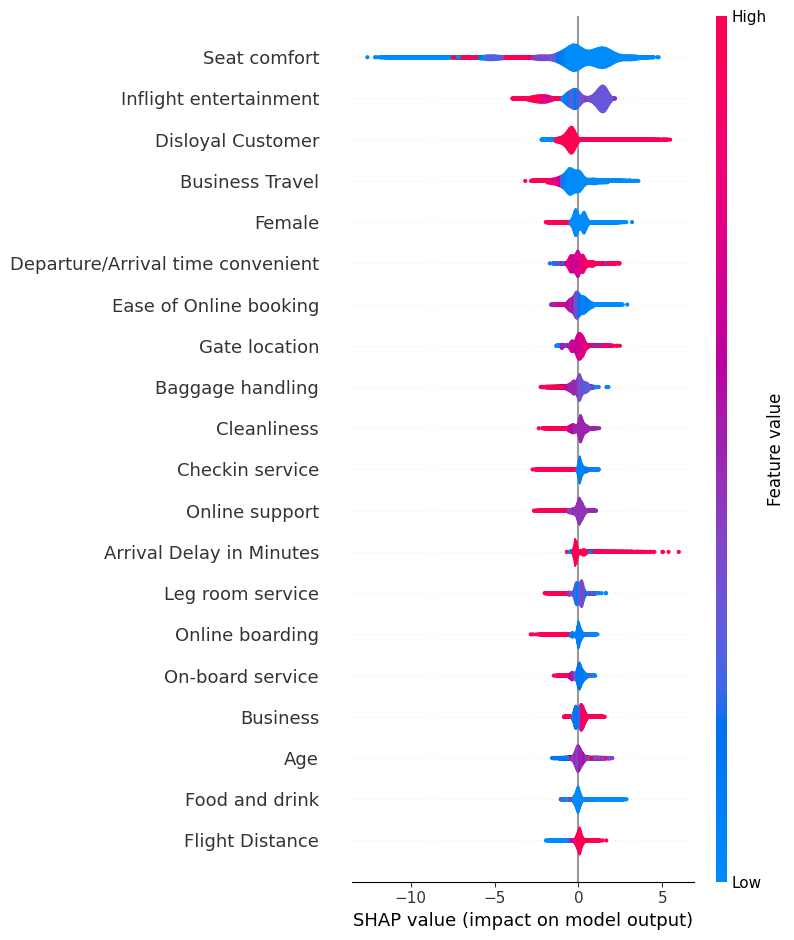

In [106]:
shap.summary_plot(shap_values, X_full_test, plot_type="violin");

Similar features have appeared in the top five most important features. These are **Seat Comfort, Inflight Entertainment, Disloyal Customer, Business Travel, and Female**. What is different then the previous visualizations is that by using SHAP values more information is illuminated about how the feature is important to the target value prediction. For example, examining the color distribution horizontally along the x axis for each variable provides insights into the general relationship between a variable's raw values and its SHAP values. For seat comfort, it can be seen that a smaller number of low seat comfort ratings has an outsized impact of bringing the SHAP values down rather then a concentrated amount of higher seat comfort ratings bringing the SHAP values up. Therefore, seat comfort has a stronger negative impact on satisfaction then positive. This could therefore be a feature that should be prioritized to decrease the number of dissatisfied customers. Another more useful visualization that can be used is a waterfall plot using SHAP values.

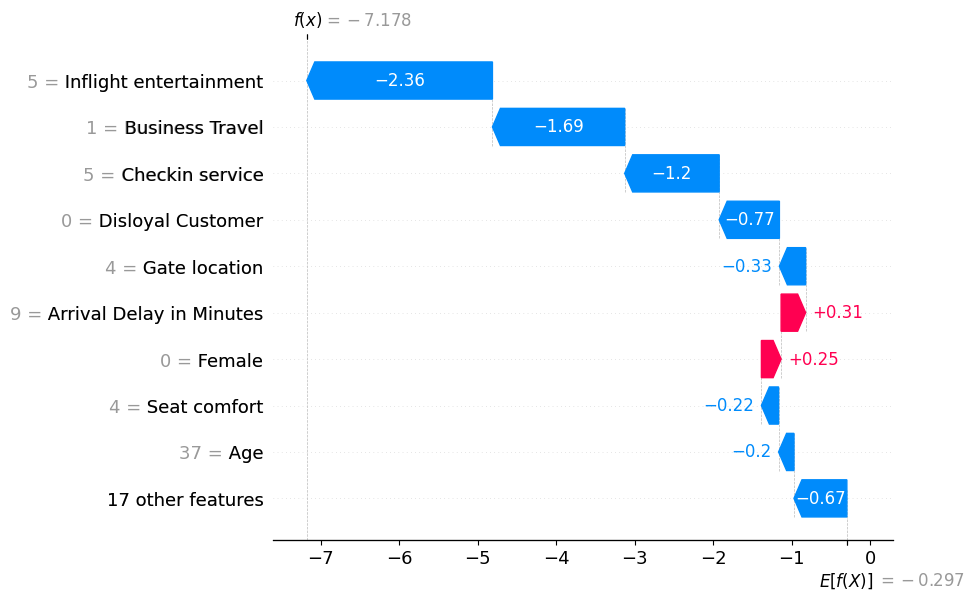

In [107]:
instance_index = 0

# Create the waterfall plot
shap.waterfall_plot(shap.Explanation(values=shap_values[instance_index],
                                     base_values=explainer.expected_value,
                                     data=X_full_test.iloc[instance_index],
                                     feature_names=X_full_test.columns.tolist()))
plt.show();

According to the waterfall plot, the overall impact of the features on the prediction of the target variable can be seen more clearly. The SHAP values shown in each red arrow corresponds to input variables that 'push' the model towards predicting a satisfied customer, whereas those in blue 'push' the model towards predicting an unsatisfied customer. There are some interesting differences between the violin plot and waterfall plot. The first difference is that seat comfort has decreased from being the most important feature to the 8th most important. However, with the information from the violin plot visualization it can be seen that this is because seat comfort has an impact on satisfied and unsatisfied customers. Therefore, when averaged the push and pull of the feature is canceled out. The final SHAP value that can be valuable for insights is a Mean Absolute SHAP value plot.

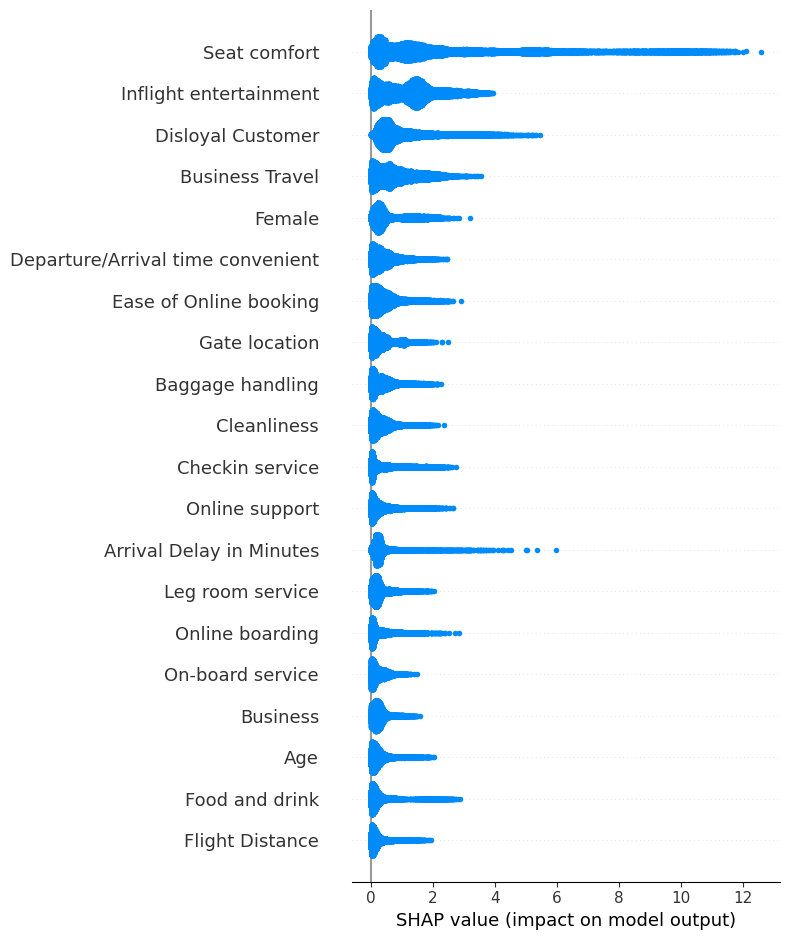

In [108]:
shap.summary_plot(abs(shap_values), feature_names=X_full_test.columns.tolist())

The SHAP absolute value summary plot does not give as much detail about how the SHAP values are impacting dissatisfacton or satisfaction but is confirmation of which features are the most important on the model prediction overall. A combination of these three visualizations will be used to make a feature recommendation for the client.

# Final Model Interpretation

The Final Model was developed by building and training a **XGBoost Model** which had an **F1 Score of 96% on unseen test data**. According to the model the following three features were determined using SHAP values to have the biggest affect on predicting client satisfaction or dissatisfaction.



*   **Seat Comfort**
*   **Inflight Entertainment**
*   **Disloyal Customer**




Additonal Research has been conducted for the client, Disney, in order to determine the cost and practical implementation of these features.

# Cost and Application of Top Three Features

## Seat Comfort

The practical application of this feature recommendation is fairly straightforward. As is shown in the SHAP value visualizations, the seat comfort can be very important on both the satisfaction and dissatisfaction of the clients. However, the cost of implementing this feature is a significant factor consider. According to [Simple Flying's article](https://simpleflying.com/aircraft-seats-cost-guide/) on aircraft costs, economy seating can cost between 4,000 usd to 10,000 usd. If, for example, Disney plans to have a fleet of Airbus A320 planes, a plane commonly used by domestic flight providers, installing the higest quality economy seat could be a cost of 1.38 million usd per plane for 138 economy seats. This is not even considering the cost of business or first class seating. Nevertheless, the importance of this feature may justify the high cost.

## Inflight Entertainment

The importance of this feature is a very exciting prospect for the client Disney as the practical application and cost of executing this feature will be extremely easy. Disney, as a company with numerous franchises under its umbrella will be able to offer customers a wide variety of entertainment for very low costs. On average, [Airlines spend 175,000](https://valourconsultancy.com/much-movie-license-cost-airline/#:~:text=In%202017%2C%20we%20estimated%20the,multiple%20movies%20within%20an%20order) usd per month on entertainment licensing. Disney will able to avoid this expense and potentially those savings may offset the cost of other feature implementations.

## Disloyal Customers

Using the visualization of the SHAP values with the violin plot, it can be seen that a large dense group of disloyal customers are more likely to be dissatisfied with their airline experience. Therefore, a feature recommendation would be that creating loyal customers can bring down the dissatisfaction push this group excercises. There is also a financial and practical implementation to this feature. Disney is a brand that has been able to create profit by developing loyal customers. Translating this customer loyalty to their new airline venture will be fairly easy to implement with their extensive experience in other markets. The profitability of a loyalty program for airlines leads to on average a [$400 million dollar profit per year](https://www.stampme.com/blog/how-much-does-a-loyalty-program-cost) even after operating costs. This profit is driven in part by airlines being able to sell miles and benefits to credit card companies. Overall, implementing a loyalty program for clients will be a profitable and practically easy to implement feature for Disney Airlines.

# Conclusion

Disney has a final cassification model for prediction with a **F1 Score of 96% performance** on unseen test data and an **AUC score of 96% performance** on unseen test data. The model was used to make predications on whether an airline customer would be **Satisfied or Dissatisfied** with their airline experience in order to make feature recommendations to decrease the number of dissatisfied customers.

The three features, as determined by the final model were:

1.   **Seat Comfort**
2.   **Inflight Entertainment**
3.   **Disloyal Customers**


# Recommendations

Now that a model has been built and trained that can predict with reasonable accuracy features that had the greatest impact on airline customer satisfaction, it can be used to recommend the top features that Disney should implement in their Disney airline venture. **It is recommended that Disney Airline should prioritize the following features and be prepared to expect the following financial costs:**



*   **Seat Comfort with a Potential Cost of 1.38 million USD per Plane**
*   **Inflight Entertainment with a Potential Monthly Savings of 175,000 USD per Month**
*   **Disney Airline Loyalty Program with a Potential Profit of 400 million USD per Year**



Of the three feature recommendations, only one would need to be implemented with a financial loss.

# Next Steps

To continue towards the goal of prioritzing feature recommendations that will lead to the least amount of dissatisfed customers, Disney could follow these additional suggestions:

1.   **Additional Domain Research for More Accurate Feature Costs and Profit Numbers**
2.   **Conduct Additional Research into other features identified as being important by the SHAP values**
3.   **Additional exploration into the optimized parameters for the LSTM and XGBoost Models to increase F1 scores**
4.   **Expand Dataset to better represent the potential customer base for a Disney Branded Airline**




# References





*   [What If the Disney Airline Rumor Was True](https://airlinegeeks.com/2019/07/23/what-if-the-disney-airline-rumor-was-true/)
*   [Airlines Cut Losses in 2022; Return to Profit in 2023](https://www.iata.org/en/pressroom/2022-releases/2022-12-06-01/)
*   [Main Parameters in XGBoost](https://medium.com/@rithpansanga/the-main-parameters-in-xgboost-and-their-effects-on-model-performance-4f9833cac7c)
*   [Binary Classification Tutorial with the Keras Deep Learning Library](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/)
*   [XGBoost Feature Importance Computed in Three Ways with Python](https://mljar.com/blog/feature-importance-xgboost/)
*   [Explaining Machine Learning Models](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/)
*   [How Much Do Aircraft Seats Cost?](https://simpleflying.com/aircraft-seats-cost-guide/)
*   [How Much Does A Movie License Cost An Airline](https://valourconsultancy.com/much-movie-license-cost-airline/#:~:text=In%202017%2C%20we%20estimated%20the,multiple%20movies%20within%20an%20order)
*   [How Much Does A Loyalty Program Cost In 2023](https://www.stampme.com/blog/how-much-does-a-loyalty-program-cost)
*   [SeatGuru Seat Map United](https://www.seatguru.com/airlines/United_Airlines/United_Airlines_Airbus_A320_V3.php)



